In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Dataset.csv")


[Cluster analysis results: Average characteristic values of different groups]

                         age   anaemia  creatinine_phosphokinase  diabetes  \
cluster_label                                                                
High Risk Group    57.922625  0.500000                549.303571  1.000000   
Low Risk Group     61.560000  0.480000                391.860000  0.000000   
Middle Risk Group  61.490503  0.398964                640.497409  0.357513   

                   ejection_fraction  high_blood_pressure      platelets  \
cluster_label                                                              
High Risk Group            39.392857             0.392857  288364.859286   
Low Risk Group             41.560000             0.440000  281955.803000   
Middle Risk Group          36.803109             0.316062  251284.085389   

                   serum_creatinine  serum_sodium       sex   smoking  \
cluster_label                                                           
Hi

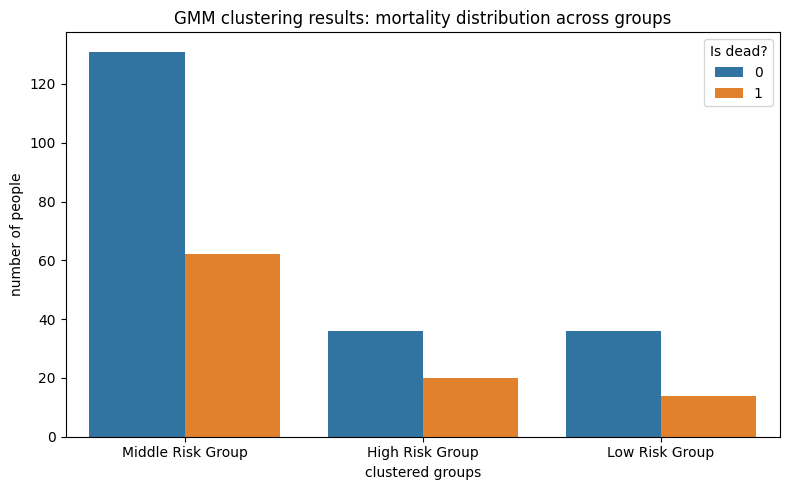

In [3]:
features = df.drop(columns=["DEATH_EVENT"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 选择聚类数为3（可根据业务调整）
gmm = GaussianMixture(n_components=3, random_state=42)
df['cluster'] = gmm.fit_predict(X_scaled)

# 给簇取名称（示例：高风险、中风险、低风险）
cluster_map = {
    df.groupby('cluster')['DEATH_EVENT'].mean().idxmax(): "High Risk Group",
    df.groupby('cluster')['DEATH_EVENT'].mean().idxmin(): "Low Risk Group"
}
for i in range(3):
    if i not in cluster_map:
        cluster_map[i] = "Middle Risk Group"

df['cluster_label'] = df['cluster'].map(cluster_map)

print("\n[Cluster analysis results: Average characteristic values of different groups]\n")
print(df.groupby('cluster_label').mean(numeric_only=True))

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cluster_label', hue='DEATH_EVENT')
plt.title("GMM clustering results: mortality distribution across groups")
plt.xlabel("clustered groups")
plt.ylabel("number of people")
plt.legend(title="Is dead?")
plt.tight_layout()
plt.show()



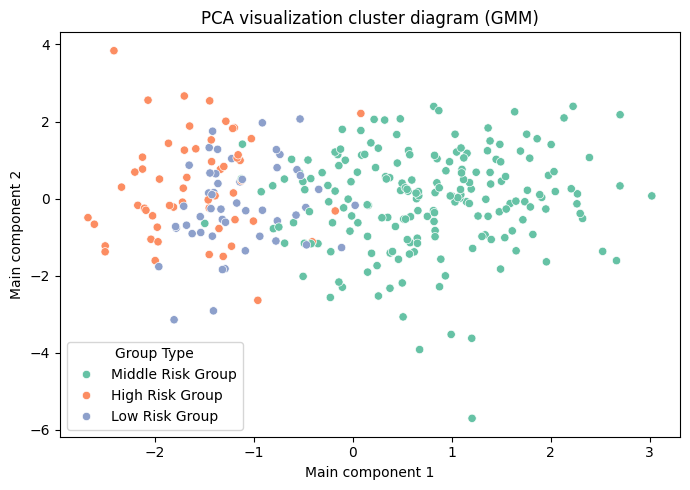

In [4]:
# 可视化降维后的聚类图
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_label', palette='Set2')
plt.title("PCA visualization cluster diagram (GMM)")
plt.xlabel("Main component 1")
plt.ylabel("Main component 2")
plt.legend(title="Group Type")
plt.tight_layout()
plt.show()

In [5]:
# 去掉 'time' 特征
cluster_means = df.drop(columns=['time']).groupby('cluster_label').mean(numeric_only=True)

# 找出各类别的影响最大的三个特征
feature_importance = cluster_means.var(axis=0).sort_values(ascending=False)

# 提取影响最大的三个特征
top_features = feature_importance.head(3).index.tolist()

print("影响最大的三个特征为：", top_features)

影响最大的三个特征为： ['platelets', 'creatinine_phosphokinase', 'ejection_fraction']
